# **Fatalaties on Australian Roads**




This project will analyse data regarding fatal motor vehicle crashes during the period of January 1989 through to March 2022. 

The aim of this notebook is to successfully analyse the two selected datasets and use the data contained within each to answer a list of proposed questions.

## **Contents of this Notebook**

* Introduction

* Proposed Questions

* Importing the Data

* Data Inspection

* Data Cleaning

* Data Analysis and Answering the Proposed Questions

* Findings and Recommendations

* Recommendations

* Conclusion

### **Introduction**
 
This project utilises two different datasets both obtained from the Australian Road Deaths Database (ARDD). The first dataset relates to the fatal crashes that have occurred in Australia between December 1989 and March 2022. The second dataset relates to the people that have died as a result of the crashes identified in the first dataset over the same period between December 1989 and March 2022. 

The ARDD is responsible for collating basic fatal crash details collected by police each month and relaying the information to the relevant road safety authorities for each State and Territory. The ARDD defines a road death or fatality as any deaths that occur within 30 days after a crash as a result of crash related injuries (Bureau of Infrastructure and Transport Research Economics (BITRE) 2022). A fatal crash is defined as any crash that results in a person losing their life as a result.

Transport plays a significant role within not only our daily lives but also for the economy. In Australia motor vehicles are the leading mode of land transport with more than 20 million motor vehicles registered in 2021, compared to a population of 25 million (Australian Bureau of Statistics 2021). This extensive use of motor vehicles in Australia has resulted in thousands of motor vehicle accidents occurring each year, with motor vehicle accidents contributing to 12% of injury hospitalisations and 10% of injury deaths occurring within Australia each year (Australian Institute of Health and Welfare 2022). In addition, motor vehicle accidents also impose a significant financial burden on society. In 2006 motor vehicle accidents cost $17.85 billion (Risbey, Cregan & De Silver 2010), which rose significantly to $30 billion in 2016 (Knaus 2017). 

Therefore, due to the significant injuries, loss of life and financial impact associated with road accidents a number of different sectors of the Australian Government are working together to implement measures that will significantly reduce serious injuries and fatalities on our roads (National Road Safety Strategy 2021). This highlights the significance of evaluating data regarding fatal crashes and fatalities on Australian roads and is a key driving factor behind the selection of these particular data sets for this project. Firstly, because it is a significant problem for society, but secondly from a personal perspective as one of the many Australians that uses a motor vehicle as their main means of transport for both work and leisure.

The list of questions for this project were formulated with the sole aim of better understanding the data contained in the datasets, and to identify any trends present within the data. The aim was to develop questions which required multiple aspects of the data to be manipulated in order to achieve the answer. These particular questions are interesting as they require multiple different factors that are associated with fatal car crashes and fatalities on Australian roads to be explored, which offers invaluable insight into the data.


### **Proposed Questions**
**1. Which year had the most fatal crashes?**

**2. Since 2010 which state has recorded the highest number of fatal crashes?**

**3. Which age group and gender has had the highest number of deaths since January 2002?**

**4. In 2016, which speed limit was associated with the highest number of fatalities occurring and how did this compare with the values from 1989-2000?**

**5. Identify which holiday period has had more fatal crashes and which state has had more fatal crashes during the Easter and Christmas holiday periods combined**

**6. Identify which month is associated with the least number of fatalities.**

**7. Which day of the week do the least number of fatalities occur?**

**8. Since 2000 how many fatal crashes have involved more than one vehicle? Which year had the greatest number of single vehicle accidents?**

**9. Which three road user types were involved in the most fatal crashes between 1992-2002?**

**10. Which year(s) had the most fatal crashes involving a) Trucks and b) Buses?**

**11. For each State how many fatalities occur during the Day and how many at Night? Which State has the greatest number of fatalities during the day and which State has the greatest number at Night?**

**12. Since 1989 which year has had the least number of fatalities? (Excluding 2022 as the year is not complete yet)**

### **Importing the Data**

In [201]:
#import required modules
import datetime as dt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#Import the data file regarding fatal crashes on Australian roads
df_fatalcrashes = pd.read_csv('fatalcrashes.csv',low_memory=False)

#Import the data file regarding fatalities on Australian roads
df_fatalities = pd.read_csv('fatalities.csv',low_memory=False)

### **Inspecting and Cleaning the Data**

In [202]:
#Get a feel for the data contained in each data set
#Start with the fatal crashes data file
print(df_fatalcrashes.columns.is_unique)
print(df_fatalcrashes.shape)
#print(df_fatalcrashes[df_fatalcrashes.duplicated() == True])
df_fatalcrashes.head()

df_fatalcrashes.dtypes

True
(48121, 20)


Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Number Fatalities                 int64
Bus \nInvolvement                object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Day of week                      object
Time of Day                      object
dtype: object

In [203]:
#Get a feel for the data contained in the fatalaties dataset
print(df_fatalities.columns.is_unique)
print(df_fatalities.shape)
#print(df_fatalities[df_fatalities.duplicated() == True])
df_fatalities.head()

True
(53430, 23)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20226011,Tas,3,2022,Friday,21:45,Single,No,No,No,...,20,Outer Regional Australia,West and North West,Waratah/Wynyard (M),Collector Road,No,No,17_to_25,Weekend,Night
1,20227010,NT,3,2022,Saturday,20:47,Single,No,No,No,...,20,Remote Australia,Northern Territory - Outback,Unincorporated NT,Sub-arterial Road,No,No,17_to_25,Weekend,Night
2,20225027,WA,3,2022,Thursday,0:25,Multiple,No,No,No,...,37,NaN,NaN,NaN,NaN,No,No,26_to_39,Weekday,Night
3,20221072,NSW,3,2022,Saturday,20:30,Multiple,No,No,No,...,19,Inner Regional Australia,Riverina,Wagga Wagga,Arterial Road,No,No,17_to_25,Weekend,Night
4,20221042,NSW,3,2022,Saturday,22:00,Single,No,No,No,...,31,Inner Regional Australia,Murray,Berrigan,National or State Highway,No,No,26_to_39,Weekend,Night


### **Cleaning the Data**

The data is in quite good condition. There are not duplicated columns, but there are some values which are missins which require some adjusting. Furthermore, there are a few columns which are not necessary for answering the proposed questions and will therefore be removed in order to make the data more user friendly. There are also columns which should be combined and also renamed in order to make the data easier to work with.

### **Fatal Crashes Data**

In [205]:
#Remove unwanted columns from the fatal crashes dataframe
#There are far too many unspecified values for National Road Type so it will be left out of the dataset
df_fatalcrashes = df_fatalcrashes.drop(
 ['Crash ID', 'SA4 Name 2016', 'National LGA Name 2017','Day of week','National Road Type','National Remoteness Areas'], 
 axis = 1 
)

df_fatalcrashes = df_fatalcrashes.rename(
 columns = {
            'Dayweek':'Day', 'Crash Type': 'Vehicles Involved','Number Fatalities':'Total Fatalities',
            'Bus \nInvolvement':'Bus Involved','Heavy Rigid Truck Involvement':'HR Truck Involved',
            'Articulated Truck Involvement':'Art Truck Involved','Christmas Period':'During Christmas',
            'Easter Period':'During Easter'
            }
)

#Merge the two truck involvement categories into one
df_fatalcrashes['Truck Involved'] = df_fatalcrashes['HR Truck Involved'] + df_fatalcrashes['Art Truck Involved']

#Replace the Values within the Truck Involved column
df_fatalcrashes['Truck Involved'] = df_fatalcrashes['Truck Involved'].replace(
['YesNo', 'NoNo', 'NoYes','-9-9','Yes-9','No-9','-9Yes','-9No'],
['Yes', 'No', 'Yes','Unknown','Yes','No','Yes','No'],
)

#Remove unwanted truck columns from the dataset
df_fatalcrashes = df_fatalcrashes.drop(
 ['HR Truck Involved','Art Truck Involved'], 
 axis = 1 
)
#Make all states uppercase
df_fatalcrashes['State'] = df_fatalcrashes['State'].str.upper()

#Replace undefined values in columns
df_fatalcrashes['Vehicles Involved'] = df_fatalcrashes['Vehicles Involved'].replace({
'-9': 'Unknown',
})

df_fatalcrashes['Bus Involved'] = df_fatalcrashes['Bus Involved'].replace({
'-9': 'Unknown',
})

df_fatalcrashes['During Easter'] = df_fatalcrashes['During Easter'].replace({
'Yes': True, 'No': False
})

df_fatalcrashes['During Christmas'] = df_fatalcrashes['During Christmas'].replace({
'Yes': True, 'No': False
})

#Rename months
df_fatalcrashes['Month'] = df_fatalcrashes['Month'].replace({
1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April',                        
5 : 'May', 6 : 'June',7 : 'July', 8 : 'August', 9 : 'September',
10 : 'October', 11 : 'November', 12 : 'December'})

#Replace NaN 
df_fatalcrashes['Total Fatalities'] = df_fatalcrashes['Total Fatalities'].fillna(0)

#Check there are no NaN values left in the data
print(df_fatalcrashes.notna()) 

#Check the columns have been properly merged and renamed 
df_fatalcrashes.head()


       State  Month  Year   Day  Time  Vehicles Involved  Total Fatalities  \
0       True   True  True  True  True               True              True   
1       True   True  True  True  True               True              True   
2       True   True  True  True  True               True              True   
3       True   True  True  True  True               True              True   
4       True   True  True  True  True               True              True   
...      ...    ...   ...   ...   ...                ...               ...   
48116   True   True  True  True  True               True              True   
48117   True   True  True  True  True               True              True   
48118   True   True  True  True  True               True              True   
48119   True   True  True  True  True               True              True   
48120   True   True  True  True  True               True              True   

       Bus Involved  Speed Limit  During Christmas  During East

,State,Month,Year,Day,Time,Vehicles Involved,Total Fatalities,Bus Involved,Speed Limit,During Christmas,During Easter,Time of Day,Truck Involved
0,NSW,March,2022,Tuesday,6:50,Single,1,No,90,False,False,Day,Yes
1,VIC,March,2022,Friday,13:05,Multiple,1,Unknown,-9,False,False,Day,Unknown
2,SA,March,2022,Friday,9:30,Multiple,1,No,80,False,False,Day,No
3,WA,March,2022,Saturday,6:00,Single,1,No,110,False,False,Day,No
4,TAS,March,2022,Tuesday,11:47,Single,1,No,100,False,False,Day,No


### **Fatalities Data**

In [206]:
#Remove unwanted columns from the fatalities dataframe
#Drop Christmas and Easter period from this dataset as it is already part of the fatal crashes dataset
df_fatalities = df_fatalities.drop(
                                  ['Crash ID','SA4 Name 2016','National LGA Name 2017',
                                   'Day of week','Christmas Period','Easter Period',
                                   'National Road Type','National Remoteness Areas'
                                   ],axis = 1,
)
 
df_fatalities = df_fatalities.rename(
 columns = {
            'Dayweek':'Day', 'Crash Type': 'Vehicles Involved','Bus Involvement':'Bus Involved',
            'Heavy Rigid Truck Involvement':'HR Truck Involved','Articulated Truck Involvement':'Art Truck Involved',
            'Age Group':'Age Groups','Time of day':'Time of Day',
           })

#Merge the two truck involvement categories into one
df_fatalities['Truck Involved'] = df_fatalities['HR Truck Involved'] + df_fatalities['Art Truck Involved']

#Replace the Values within the Truck Involved column
df_fatalities['Truck Involved'] = df_fatalities['Truck Involved'].replace(
['YesNo', 'NoNo', 'NoYes','-9-9','Yes-9','No-9','-9Yes','-9No'],
['Yes', 'No', 'Yes','Unknown','Yes','No','Yes','No'],
)

#Remove unwanted truck columns from the dataset
df_fatalities = df_fatalities.drop(
 ['HR Truck Involved','Art Truck Involved'], 
 axis = 1 
)

#Make all states uppercase
df_fatalities['State'] = df_fatalities['State'].str.upper()

#Replace undefined values in columns
df_fatalities['Vehicles Involved'] = df_fatalities['Vehicles Involved'].replace({
'-9': 'Unknown',
})

df_fatalities['Bus Involved'] = df_fatalities['Bus Involved'].replace({
'-9': 'Unknown',
})

df_fatalities['Gender'] = df_fatalities['Gender'].replace({
'-9': 'Unknown',
})

#Replace the values in the Age Group Column
#Find out the total values of the column to know which values need to be replaced
print(df_fatalities['Age Groups'].value_counts())

#Rename months
df_fatalities['Month'] = df_fatalities['Month'].replace({
1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April',                        
5 : 'May', 6 : 'June',7 : 'July', 8 : 'August', 9 : 'September',
10 : 'October', 11 : 'November', 12 : 'December'})

#To keep all values as integers the 75 or older category becomes the >=75
df_fatalities['Age Groups'] = df_fatalities['Age Groups'].replace({
'17_to_25': '17 to 25','40_to_64': '40 to 64',
'26_to_39': '26 to 39','75_or_older': '75 or older',
'0_to_16': '0 to 16','65_to_74': '65 to 74',
'-9': 'Unknown',})

#Check there are no NaN values left in the data
print(df_fatalities.notna()) 

#Check the columns have been properly merged and renamed 
df_fatalities.head()


17_to_25       13894
40_to_64       13603
26_to_39       12480
75_or_older     5176
0_to_16         4107
65_to_74        4073
-9                97
Name: Age Groups, dtype: int64
       State  Month  Year   Day  Time  Vehicles Involved  Bus Involved  \
0       True   True  True  True  True               True          True   
1       True   True  True  True  True               True          True   
2       True   True  True  True  True               True          True   
3       True   True  True  True  True               True          True   
4       True   True  True  True  True               True          True   
...      ...    ...   ...   ...   ...                ...           ...   
53425   True   True  True  True  True               True          True   
53426   True   True  True  True  True               True          True   
53427   True   True  True  True  True               True          True   
53428   True   True  True  True  True               True          True   
53429   

,State,Month,Year,Day,Time,Vehicles Involved,Bus Involved,Speed Limit,Road User,Gender,Age,Age Groups,Time of Day,Truck Involved
0,TAS,March,2022,Friday,21:45,Single,No,100,Driver,Male,20,17 to 25,Night,No
1,NT,March,2022,Saturday,20:47,Single,No,100,Driver,Male,20,17 to 25,Night,No
2,WA,March,2022,Thursday,0:25,Multiple,No,50,Pedestrian,Female,37,26 to 39,Night,No
3,NSW,March,2022,Saturday,20:30,Multiple,No,100,Passenger,Male,19,17 to 25,Night,No
4,NSW,March,2022,Saturday,22:00,Single,No,80,Driver,Male,31,26 to 39,Night,No


### **Data Analysis for the Proposed Questions**



**1. Which year had the most fatal crashes?**

1989    2407
1990    2050
1991    1874
1992    1736
1993    1737
1994    1702
1995    1822
1996    1768
1997    1601
1998    1573
1999    1553
2000    1628
2001    1584
2002    1525
2003    1445
2004    1444
2005    1472
2006    1452
2007    1453
2008    1315
2009    1347
2010    1233
2011    1151
2012    1190
2013    1101
2014    1051
2015    1100
2016    1198
2017    1126
2018    1054
2019    1100
2020     996
2021    1043
2022     290
Name: Year, dtype: int64


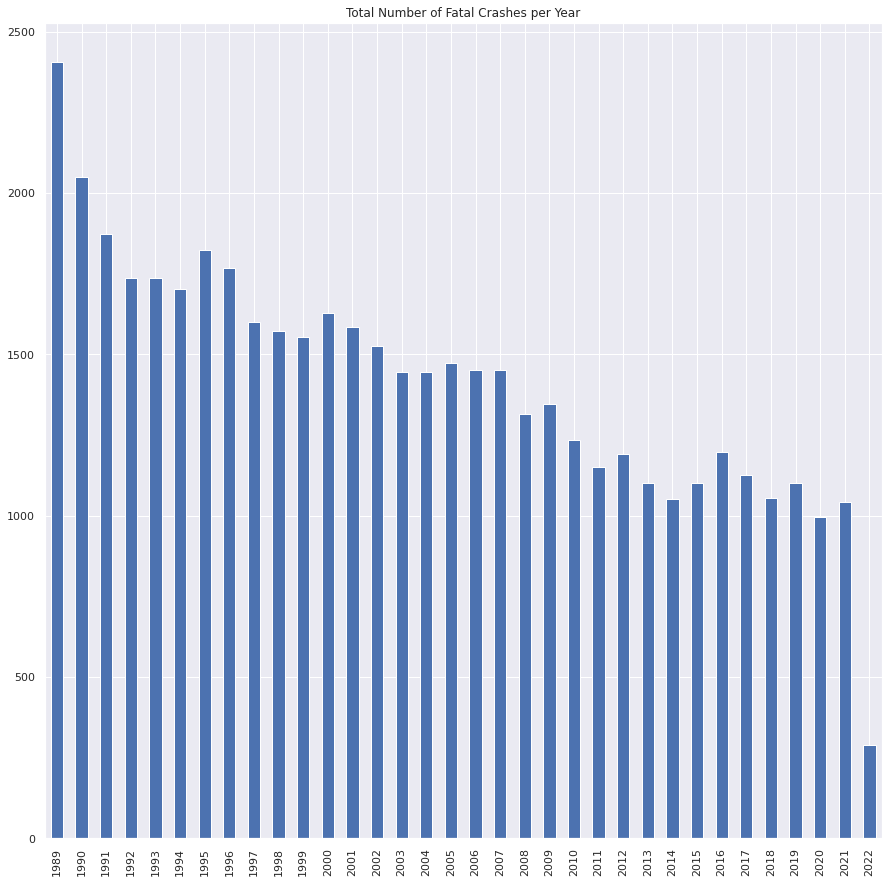

In [207]:
df1 = df_fatalcrashes

#Filter to select column of interest
df1 = df1[['Year']]

#Value counts for the amount of fatal crashes per year
df1 = df1['Year'].value_counts()

#Sort the values by the years rather than the values of each year
df1 = df1.sort_index()

#print the results 
print(df1)

#Plot data 
df1.plot(kind = 'bar', 
    title = 'Total Number of Fatal Crashes per Year',
    figsize = [15, 15])
plt.savefig('plot1.png')


#### **Question 1 Answer**

The greatest number of fatal crashes occurred in 1989.

**2. Since 2010 which state has recorded the highest number of fatal crashes?**

NSW    3925
VIC    2898
QLD    2839
WA     1919
SA     1120
NT      440
TAS     377
ACT     115
Name: State, dtype: int64


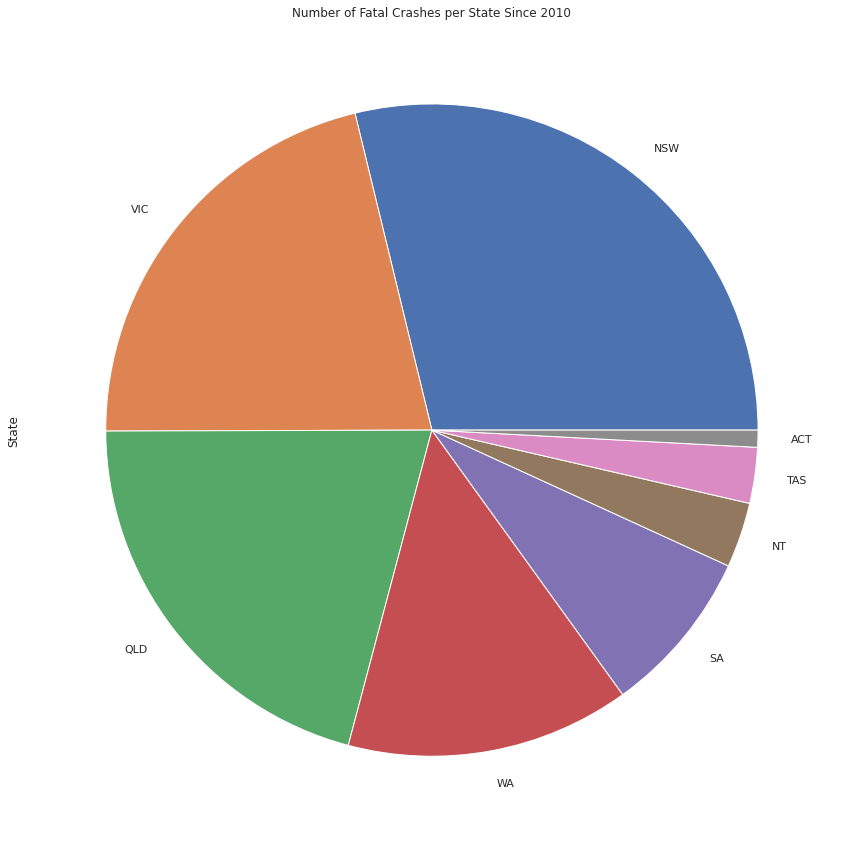

In [208]:
df2 = df_fatalcrashes

#Select the two columns you want to keep
df2 = df2[['State', 'Year']]

#Filter the rows to only use values for 2010 - 2022
df2 = df2.loc[df2['Year'] >= 2010]

#Print the number of fatalities per state since 2010
df2 = df2['State'].value_counts()
print(df2)

#Plot the data using a pie graph
df2.plot(
    kind = 'pie', 
    figsize = [15, 15],
    title = 'Number of Fatal Crashes per State Since 2010')
plt.savefig('plot2.png')


#### **Question 2 Answer**
Since 2010, NSW has recorded the highest number of fatal crashes, with a total of 3925 fatal crashes within that time period.

**3. Which age group and gender has had the highest number of deaths since January 2002?**

Gender       Female    Male  Undetermined
Age Groups                               
Unknown         6.0    20.0           6.0
75 or older  1189.0  1780.0           0.0
65 to 74      722.0  1362.0           0.0
40 to 64     2076.0  5967.0           0.0
26 to 39     1317.0  5052.0           1.0
17 to 25     1448.0  4874.0           0.0
0 to 16       670.0   997.0          17.0


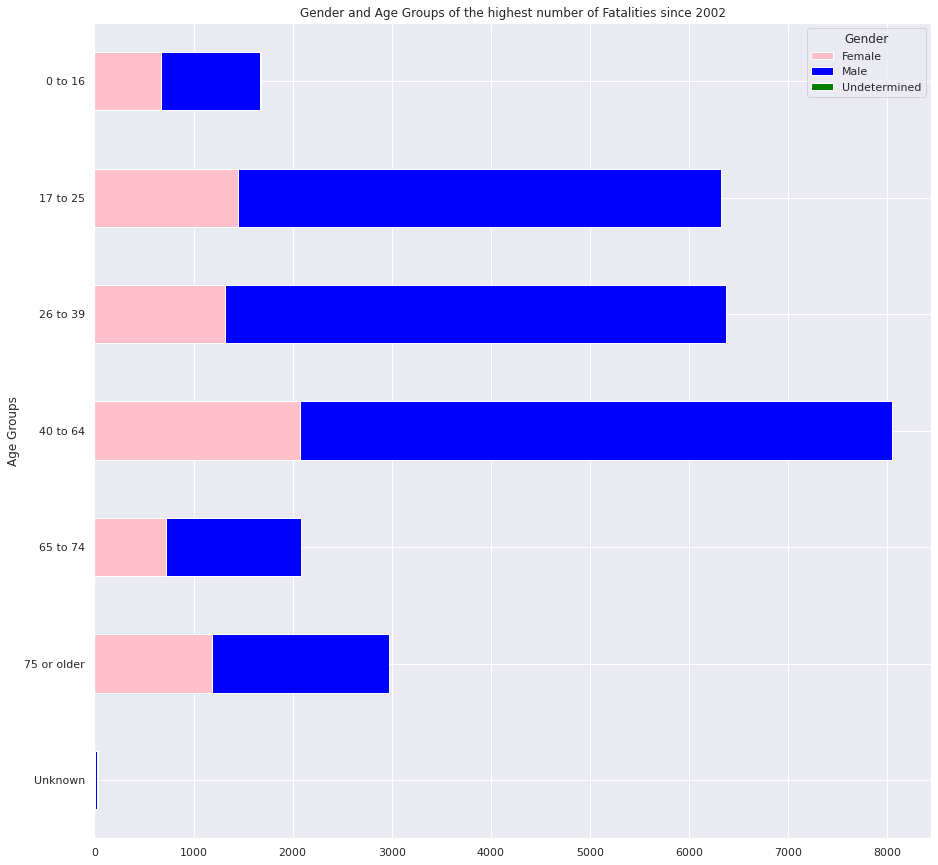

In [209]:
df3 = df_fatalities

#Select the three columns you want to keep
df3 = df3[['Gender', 'Age Groups', 'Year']]

#Filter the rows to only use values for 2002 - 2022
df3 = df3.loc[df3['Year'] >= 2002]

#Group and unstack columns of interest
df3 = df3.groupby(['Age Groups','Gender']).size() 
df3 = df3.unstack()
df3 = df3.fillna(value=0.0)

#Creat a new column combining Unknown and Unspecified values
df3['Undetermined'] = df3['Unknown'] + df3 ['Unspecified']

#Drop the unwanted columns
df3 = df3.drop(
 ['Unknown','Unspecified'],
 axis = 1,
)

#Sort the values by Age Group and print the values
df3 = df3.sort_values(by=['Age Groups'],ascending=False)
print(df3)

#Plot the data
df3.plot(
    kind = 'barh',
    stacked = True,
    color = ['pink','blue','green'],
    figsize = [15,15],
    title = 'Gender and Age Groups of the highest number of Fatalities since 2002')
plt.savefig('plot3.png')

#### **Question 3 Answer**

Since January 2022, the highest proportion of fatalities have been males between 40-64 years old, with a total of 5967 fatalities occurring within this category.

**4. In 2016, which speed limit was associated with the highest number of fatalities occurring and how did this compare with the values from 1989-2000?**

100    408
60     222
80     200
110    181
50     139
70      73
90      32
40      16
130     11
-9       9
10       1
Name: Speed Limit, dtype: int64


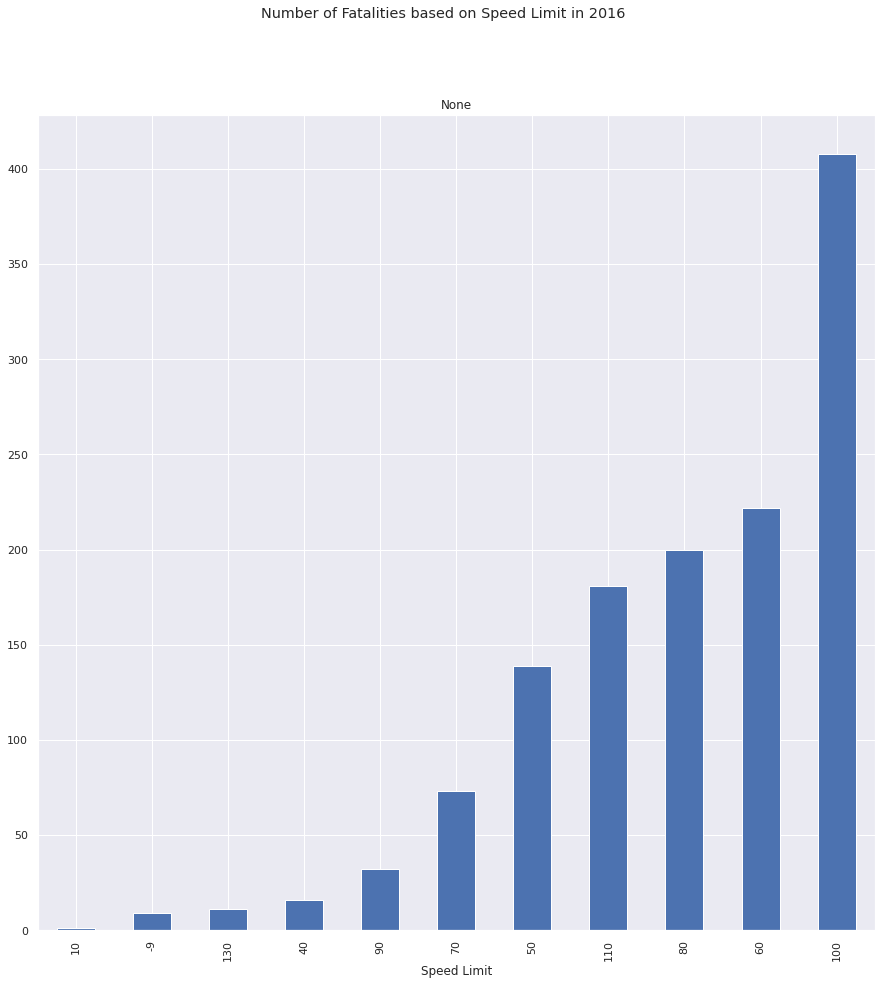

In [210]:
df4 = df_fatalities
df4 = df4 [['Speed Limit','Year']]

#Filter the rows to only provide the values for the year 2016
df_2016 = df4.loc[df4['Year'] == 2016]
print(df_2016['Speed Limit'].value_counts())

#Group and Unstack columns of interest
df_2016 = df_2016[['Speed Limit']]
df_2016 = df_2016.groupby('Speed Limit').value_counts()

#Sort values based on number of fatalities from smallest to largest
df_2016 = df_2016.sort_values(ascending=True)

#Plot data
df_2016.plot(
    kind = 'bar',
    stacked = True,
    figsize = [15,15],
    subplots = True,
    title = 'Number of Fatalities based on Speed Limit in 2016')
plt.savefig('plot3.png')

100    8605
60     8283
110    2562
80     2180
70      900
-9      814
90      429
75      252
50       92
40       66
30        3
20        3
Name: Speed Limit, dtype: int64


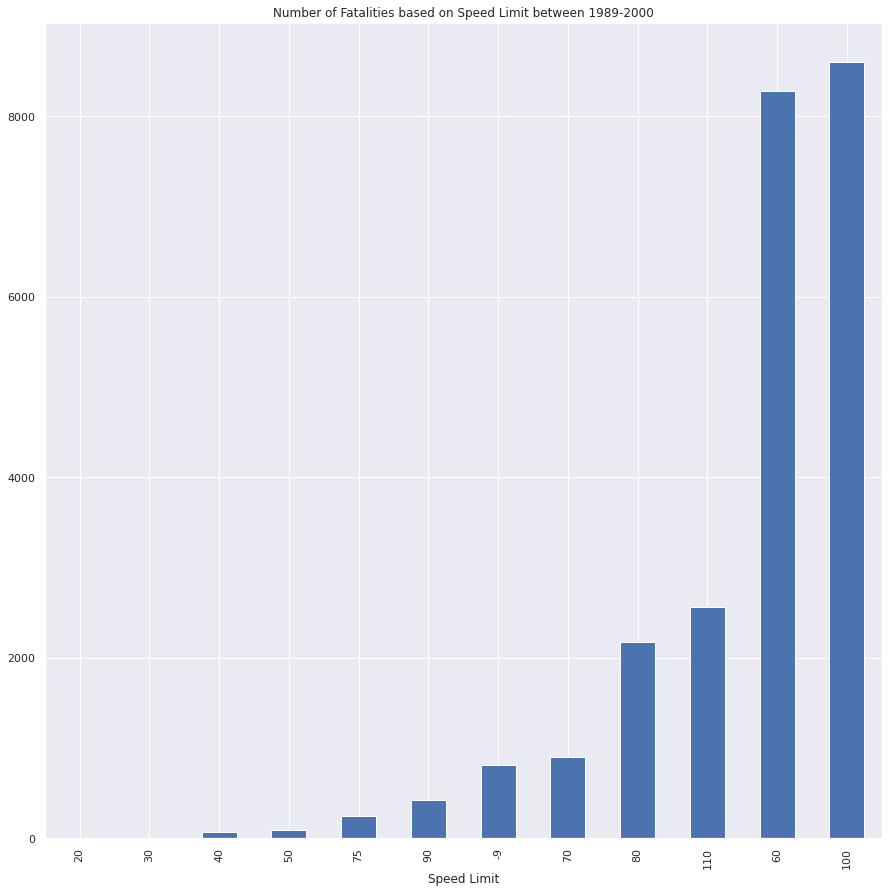

In [211]:
#Filter the rows to only include values between 1989-2000
df_decade = df4.loc[df4['Year'] <=2000]
print(df_decade['Speed Limit'].value_counts())

#Group and unstack columns of interest
df_decade = df_decade[['Speed Limit']]
df_decade = df_decade.groupby('Speed Limit').value_counts()

#Sort values based on number of fatalities from smallest to largest
df_decade = df_decade.sort_values(ascending=True)


df_decade.plot(
    kind = 'bar',
    stacked = True,
    figsize = [15,15],
    title = 'Number of Fatalities based on Speed Limit between 1989-2000')
plt.savefig('plot4.png')

#### **Question 4 Answer**

In 2016 the highest proportion of fatalities occurred at the speed limit of 100km. This mirrors the total amount of fatalities during 1989-2000 as the 100km speed limit was identified as the speed limit associated with the most fatalities. In 2016, there were 408 fatalities at this speed and 8605 in total between 1989-2000.

**5. Identify which holiday period has had more fatal crashes and which state has had more fatal crashes during the Easter and Christmas holiday periods combined**

False    47874
True       247
Name: During Easter, dtype: int64
False    46651
True      1470
Name: During Christmas, dtype: int64
      State    Month  Year        Day   Time Vehicles Involved  \
0       NSW    March  2022    Tuesday   6:50            Single   
1       VIC    March  2022     Friday  13:05          Multiple   
2        SA    March  2022     Friday   9:30          Multiple   
3        WA    March  2022   Saturday   6:00            Single   
4       TAS    March  2022    Tuesday  11:47            Single   
...     ...      ...   ...        ...    ...               ...   
48116   VIC  January  1989     Friday  13:20            Single   
48117   QLD  January  1989     Monday   9:00          Multiple   
48118   VIC  January  1989     Friday  17:15          Multiple   
48119   NSW  January  1989    Tuesday  14:10          Multiple   
48120    SA  January  1989  Wednesday  11:45          Multiple   

       Total Fatalities Bus Involved Speed Limit  During Christmas  \
0     

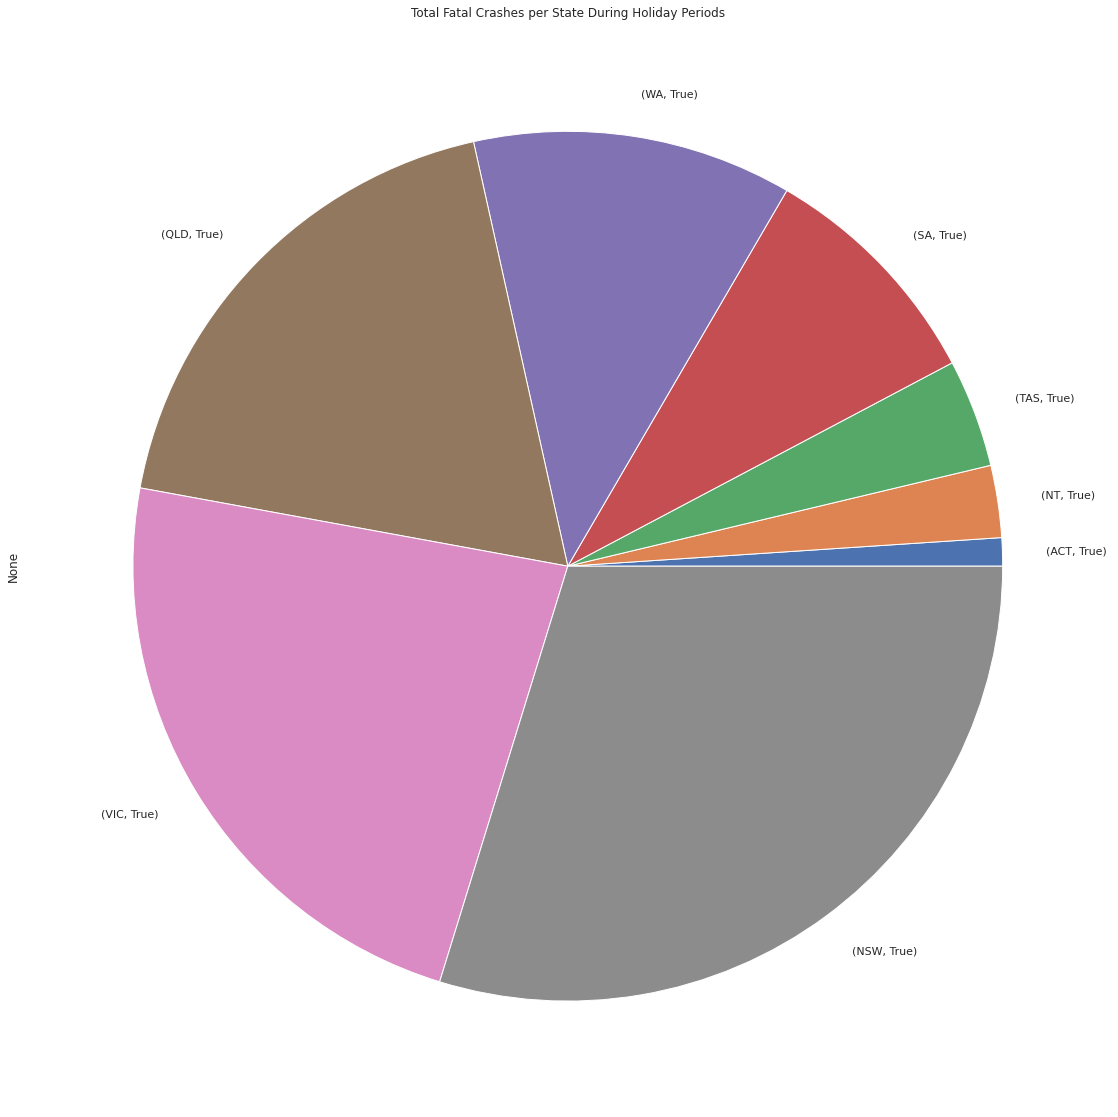

In [212]:
df5 = df_fatalcrashes

#Identify the Holiday period with the most number of fatal crashes
print(df5['During Easter'].value_counts())
print(df5['During Christmas'].value_counts())

#Create a new column for combined holiday periods
df5['Total Holiday Period']=df5['During Christmas']+df5['During Easter']
print(df5)

#Filter the dataframe to only select columns of interest
df5 = df5[['State','Total Holiday Period']]

#Filter the data to only keep True values
df5 = df5[(df5['Total Holiday Period'] == True)]
df5 = df5.groupby(['State','Total Holiday Period']).size()
df5 = df5.sort_values()

#Plot data
df5.plot(
    kind = 'pie',
    #stacked = False,
    figsize = [30,20],
    #subplots = True,
    title = 'Total Fatal Crashes per State During Holiday Periods')
plt.savefig('plot5.png')

#### **Question 5 Answer**
The holiday period with the greatest number of fatal crashes is the Christmas period with a total of 1470 fatal crashes over the last 33 years.

The state with the highest number of fatal crashes during both the Easter and Christmas holiday periods is NSW.



**6. Identify which month is associated with the least number of fatalities.**

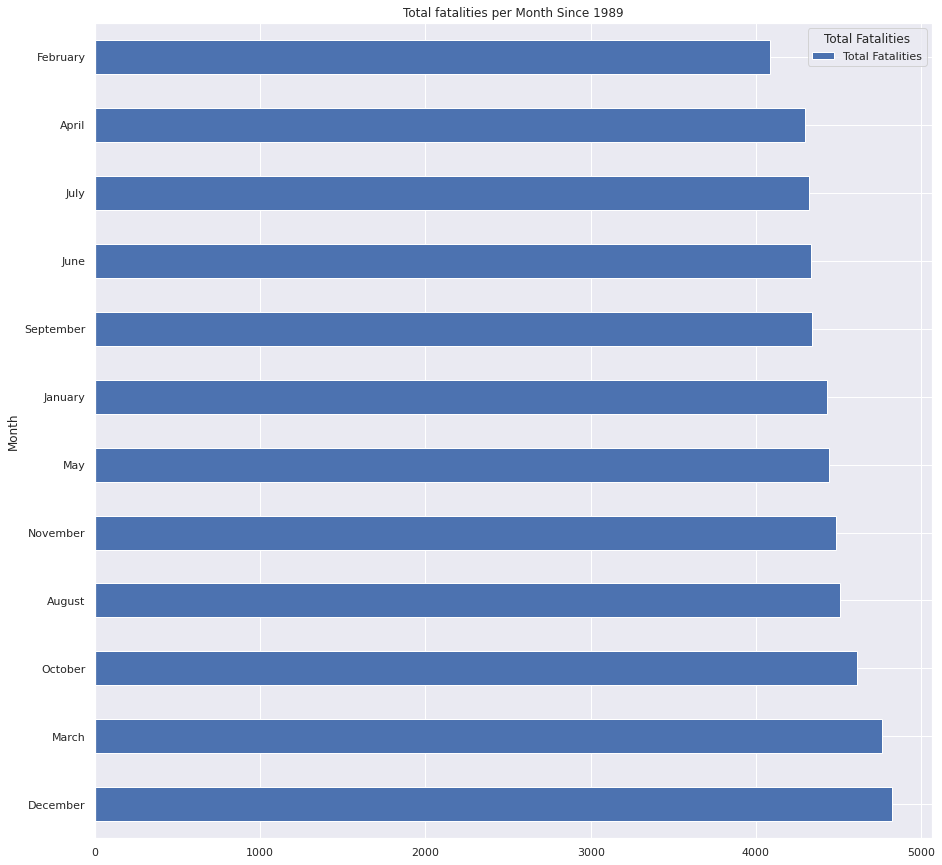

In [213]:
df6 = df_fatalcrashes

#Select the columns you want
df6 = df6[['Total Fatalities','Month']]
df6 = df6.sort_values(by=['Month'],ascending=False)

#Group and unstack the columns of interest and replace any missing values with 0.0
df6 = df6.groupby(['Month','Total Fatalities']).size()
df6 = df6.unstack()
df6 = df6.fillna(value=0.0)

#Adjust the results to account for the number of fatalities occuring in each category
df6['2 fatalities'] = df6[2]*2
df6['3 fatalities'] = df6[3]*3
df6['4 fatalities'] = df6[4]*4
df6['5 fatalities'] = df6[5]*5
df6['6 fatalities'] = df6[6]*6
df6['7 fatalities'] = df6[7]*7
df6['10 fatalities'] = df6[10]*10
df6['11 fatalities'] = df6[11]*11
df6['12 fatalities'] = df6[12]*12
df6['20 fatalities'] = df6[20]*20
df6['35 fatalities'] = df6[35]*35

#drop the unwanted values from the dataset
df6 = df6.drop(
    [2,3,4,5,6,7,10,11,12,20,35], 
    axis = 1 
)

#Create a new column with the total sum of each row
df6['Total Fatalities'] = df6.sum(axis=1)

#Sort the values according to the total number of fatalities
df6 = df6.sort_values(by=['Total Fatalities'],ascending=False)
df6 = df6[['Total Fatalities']]

#Plot data
df6.plot(
    kind = 'barh',
    stacked = True,
    #color = ['r', 'g'],
    figsize = [15,15],
    title = 'Total fatalities per Month Since 1989')
plt.savefig('plot6.png')



#### **Question 6 Answer**
The month with the least number of fatalities is February, with a total amount of 4084 fatalities since 1989 compared to December, which accounts for 4825 fatalities, which is the highest number of fatalities within the same period of time.

**7. Which day of the week do the least number of fatalities occur?**

Day
Saturday     9790
Friday       8761
Sunday       8554
Thursday     7192
Wednesday    6742
Tuesday      6220
Monday       6171
dtype: int64


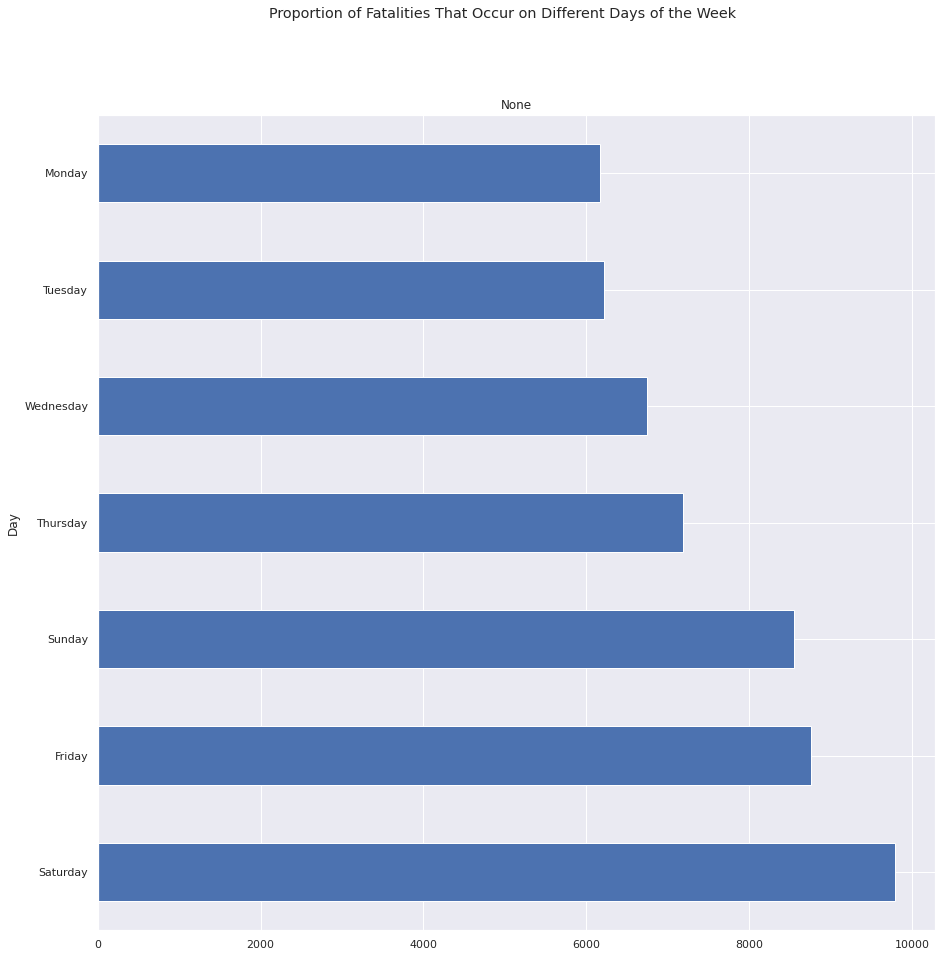

In [214]:
df7 = df_fatalities

#Select the column you want to keep
df7 = df7[['Day']]

#Group the column of interest
df7 = df7.groupby('Day').size()
df7 = df7.sort_values(ascending=False)
print(df7)

#Plot the data
df7.plot(
    kind = 'barh', 
    figsize = [15, 15],
    subplots = True,
    title = 'Proportion of Fatalities That Occur on Different Days of the Week')
plt.savefig('plot7.png')

#### **Question 7 Answer**
Of all the days of the week the least number of fatalities have occurred on a Monday with a total of 6171 fatalities since 1989. The most fatalities occur on a Saturday, with a grand total of 9790 fatalities occurring on a Saturday.

#### **8. Since 2000 how many fatal crashes have involved more than one vehicle? Which year had the greatest number of single vehicle accidents?**


2000    692
2001    678
2005    625
2002    623
2004    620
2003    603
2007    597
2006    596
2010    549
2009    539
2012    538
2008    521
2016    519
2017    503
2011    493
2015    467
2014    462
2013    459
2019    432
2021    431
2020    427
2018    421
2022    119
Name: Year, dtype: int64
Vehicles Involved  Multiple
Year                       
2000                    692
2001                    678
2002                    623
2003                    603
2004                    620
2005                    625
2006                    596
2007                    597
2008                    521
2009                    539
2010                    549
2011                    493
2012                    538
2013                    459
2014                    462
2015                    467
2016                    519
2017                    503
2018                    421
2019                    432
2020                    427
2021                    431
2022                    119

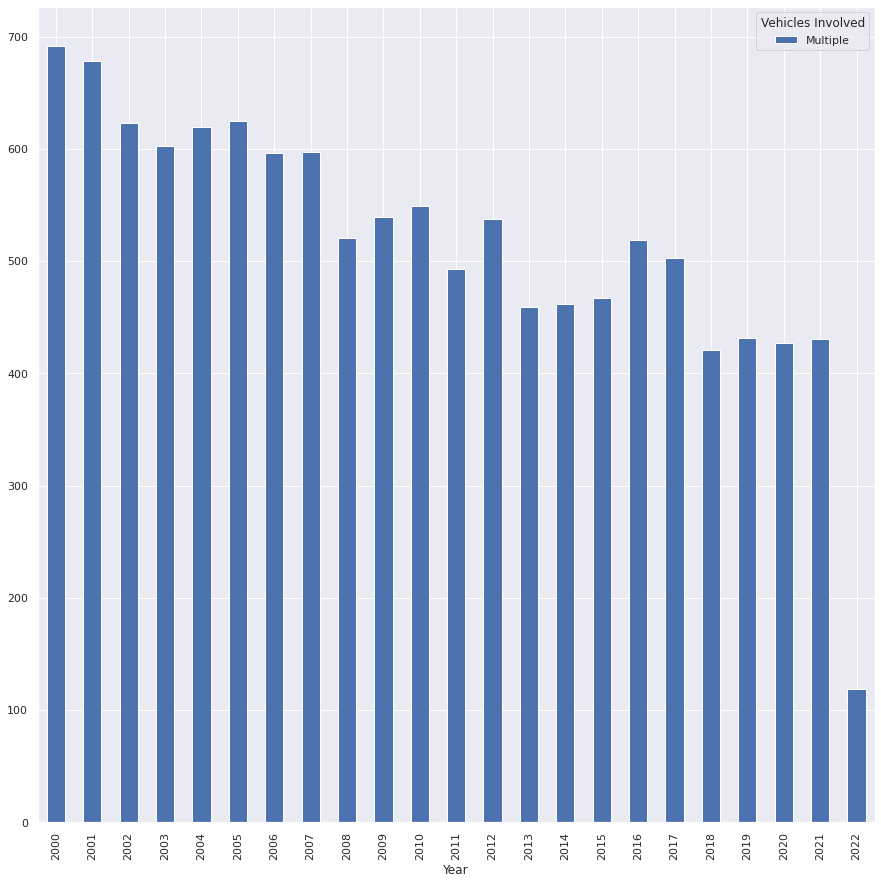

In [215]:
df8 = df_fatalcrashes

#Filter to only select columns of interest
df8 = df8[['Vehicles Involved','Year']]

#Filter values to only include values since 2000
df8 = df8.loc[(df8['Year'] >= 2000) & (df8['Vehicles Involved'] == 'Multiple')]

#Identify total of multiple vehicle crashes per year
print(df8['Year'].value_counts())

#Group and unstack columns of interest
df8 = df8.groupby(['Year','Vehicles Involved']).size()
df8 = df8.unstack()
print(df8)
df8 = df8.sort_values(by=['Year'], ascending = True)

#Calculate sum of total multiple vehicle fatal crashes
print(df8['Multiple'].sum())

#Plot data
df8.plot(kind='bar',
        figsize=[15,15],
        stacked = False
)
plt.savefig('plot8a.png')



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


1989    2407
1990    2050
1991    1874
1995    1822
1996    1768
1993    1737
1992    1736
1994    1702
2000    1628
1997    1601
2001    1584
1998    1573
1999    1553
2002    1525
2005    1472
2007    1453
2006    1452
2003    1445
2004    1444
2009    1347
2008    1315
2010    1233
2016    1198
2012    1190
2011    1151
2017    1126
2013    1101
2015    1100
2019    1100
2018    1054
2014    1051
2021    1043
2020     996
2022     290
Name: Year, dtype: int64


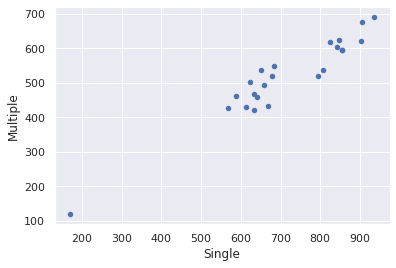

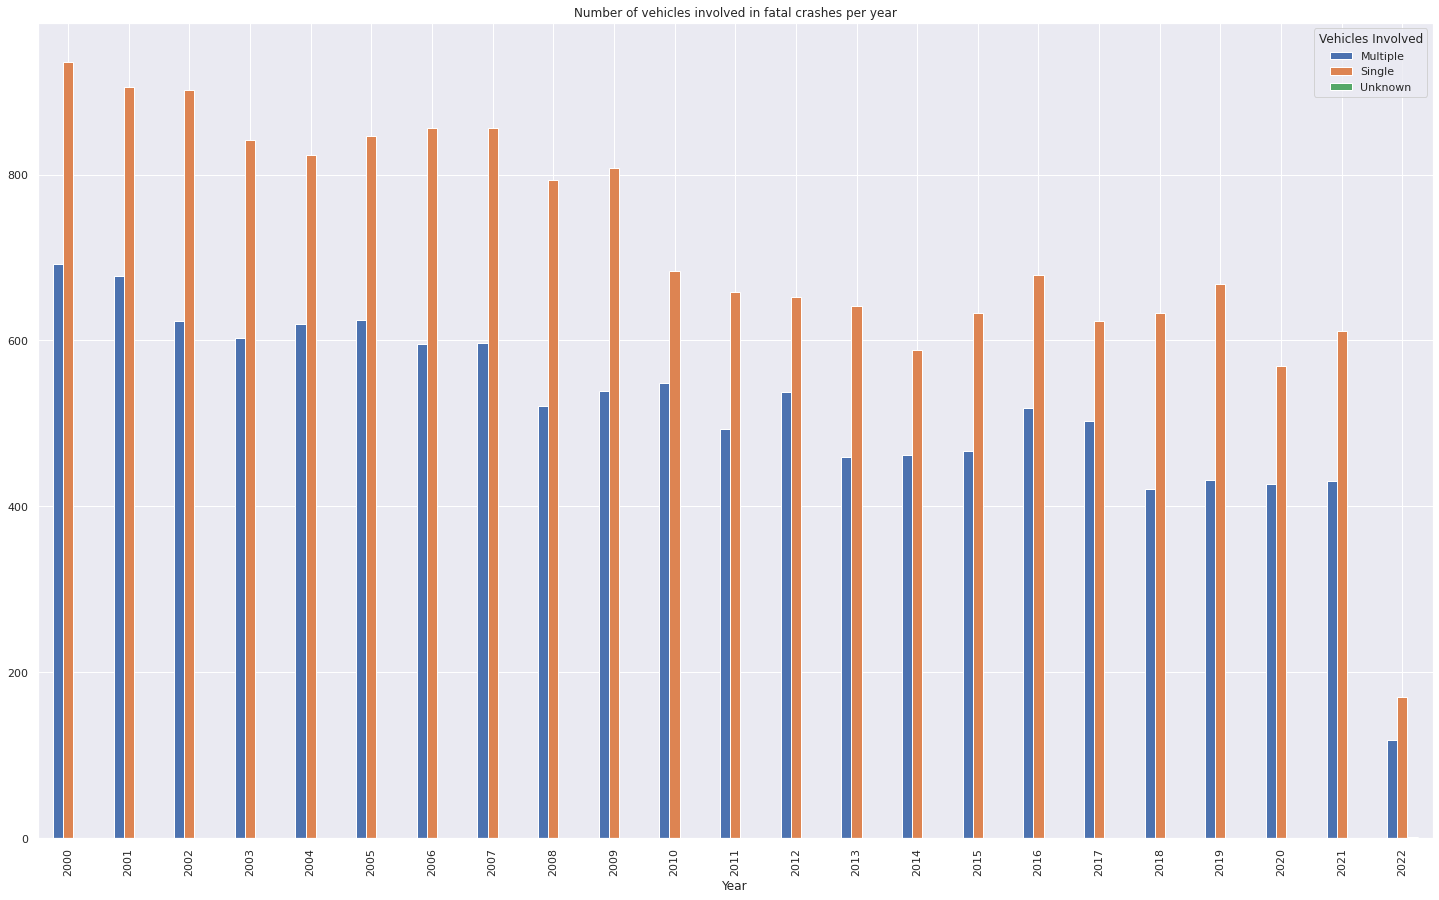

In [216]:
df0 = df_fatalcrashes

#Filter to only select columns of interest
df0 = df0[['Vehicles Involved','Year']]

#Count the total number of single and multiple vehicle crashes each year
print(df0['Year'].value_counts())

#Filter values to only include values since 2000
df0 = df0.loc[(df0['Year'] >= 2000)]

#Group and unstack columns of interest
df0 = df0.groupby(['Year','Vehicles Involved']).size()
df0 = df0.unstack()
df0 = df0.sort_values(by=['Year'], ascending=True)

#Plot data
df0.plot(kind='scatter',
         x = 'Single',
         y = 'Multiple')
plt.savefig('plot8b.png')

df0.plot(kind='bar',
         figsize=[25,15],
         stacked=False,
         title='Number of vehicles involved in fatal crashes per year'
)
plt.savefig('plot8c.png')


#### **Question 8 Answer**

Since 2000, a total of 11 914 multiple vehicle fatal crashes have occurred.

In that same period of time the largest number of single vehicle crashes occurred in 2000, with a total of 936 single vehicle crashes occurring.


**9. Which three road user types were involved in the most fatal crashes between 1992-2002?**

Driver                          21137
Passenger                       10387
Pedestrian                       7039
Motorcycle rider                 6024
Cyclist                          1207
Motorcycle pillion passenger      297
Other/-9                           95
Name: Road User, dtype: int64


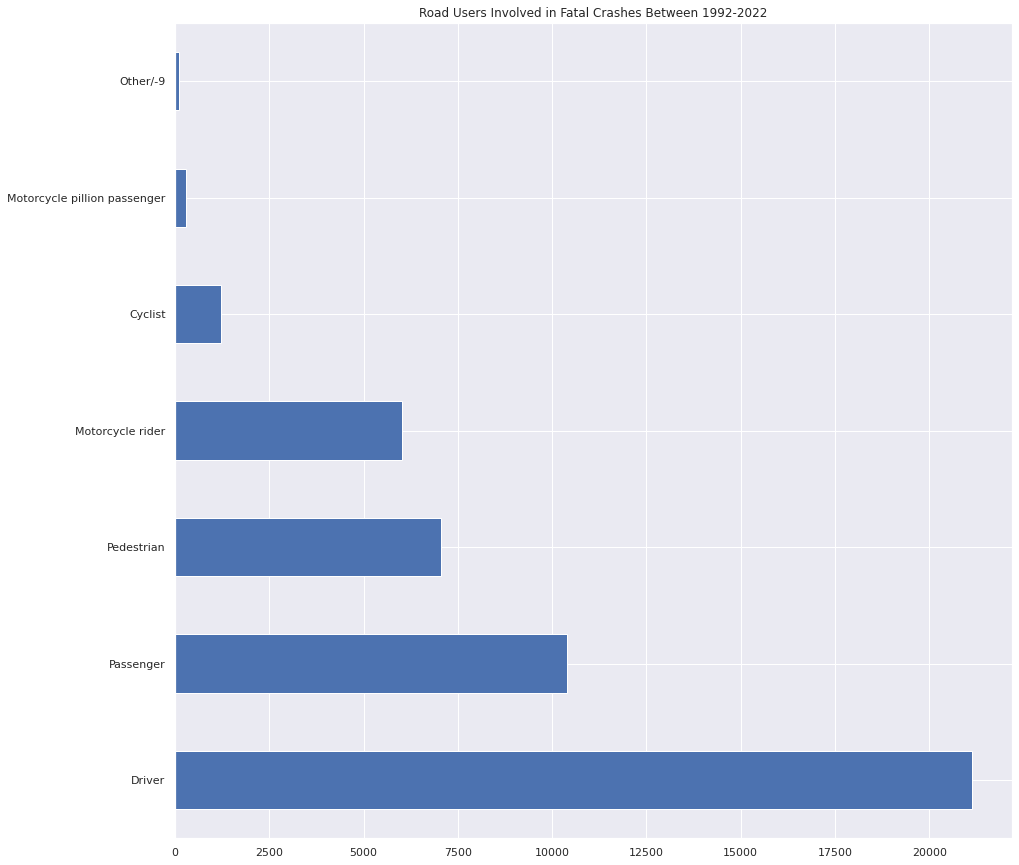

In [217]:
df9 = df_fatalities

#Select the two columns you want to keep
df9 = df9[['Road User', 'Year']]

#Filter the rows to only use values for 2010 - 2022
df9 = df9.loc[df9['Year'] >= 1992]

#Print the number of fatalities per state since 2010
df9 = df9['Road User'].value_counts()
print(df9)

#Plot the data using a pie graph
df9.plot(
    kind = 'barh', 
    figsize = [15, 15],
    title = 'Road Users Involved in Fatal Crashes Between 1992-2022')
plt.savefig('plot9.png')


#### **Question 9 Answer**
The top three user types involved in fatal crashes between 1992 and 2002 were Drivers with 21 137 involvements, Passengers with 10 387 involvements and then Pedestrians with 7039 involvements. 

#### **10. Which year(s) had the most fatal crashes involving a) Trucks and b) Buses?**

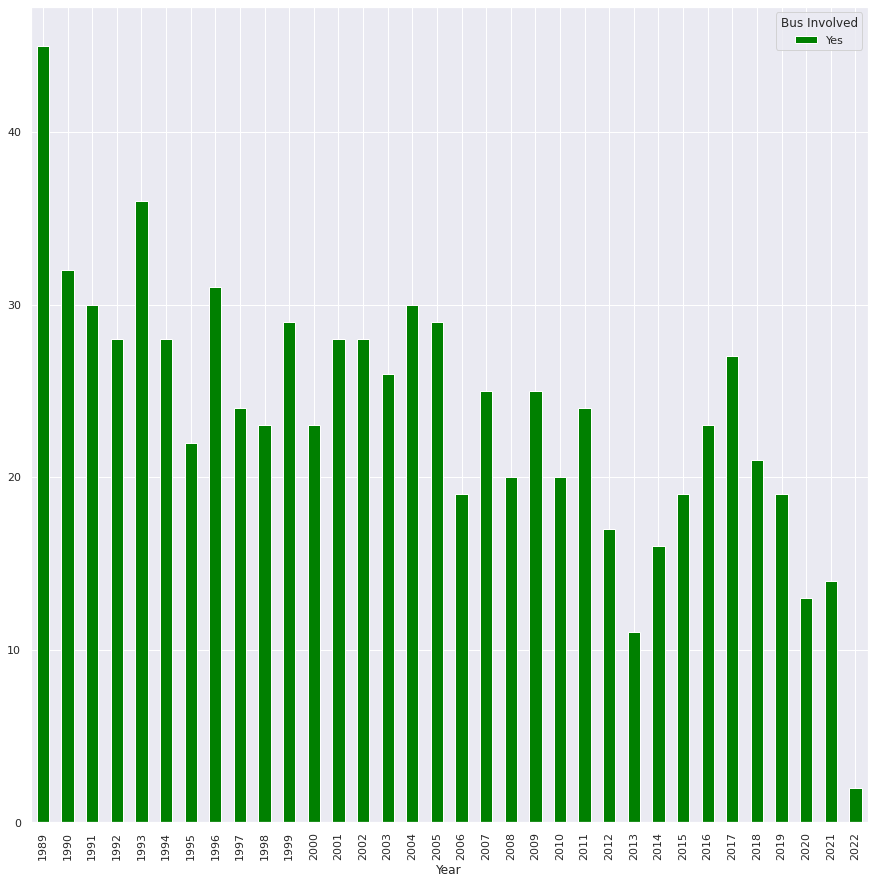

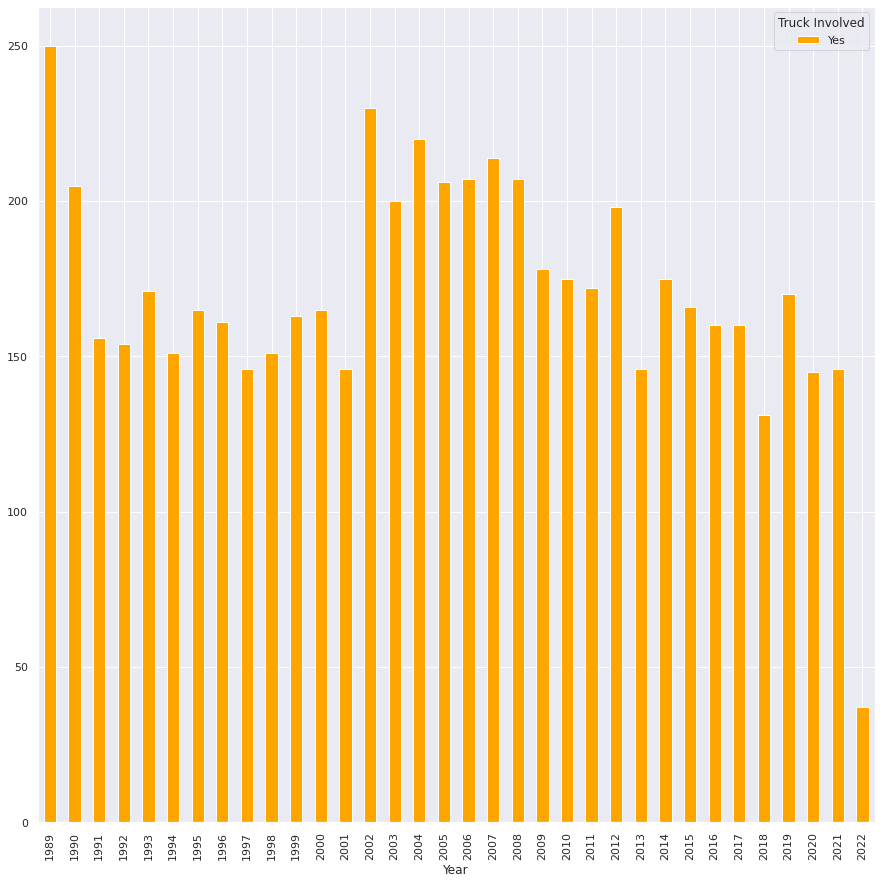

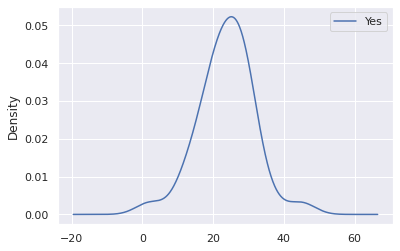

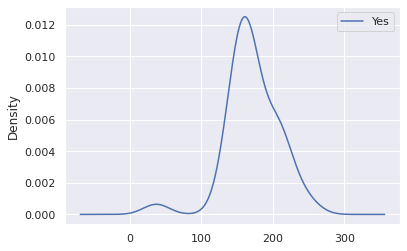

In [218]:
df10 = df_fatalcrashes

#Select to only keep columns of interest
df10 = df10[['Year','Bus Involved']]

#Filter rows to only include values of interest
df10 = df10.loc[(df10['Bus Involved'] == 'Yes')]

#Group and unstack columns of interest
df10 = df10.groupby(['Year','Bus Involved']).size()
df10 = df10.unstack()
df10 = df10.sort_values(by=['Year'], ascending=True)

#Repeat above steps with df11
df11 = df_fatalcrashes
df11 = df11[['Year','Truck Involved']]

df11 = df11.loc[(df11['Truck Involved'] == 'Yes')]

df11 = df11.groupby(['Year','Truck Involved']).size()
df11 = df11.unstack()
df11 = df11.sort_values(by=['Year'], ascending=True)

#Plot data
df10.plot(
 kind = 'bar',
 color = 'green',
 figsize = [15,15]
)
plt.savefig('plot10a.png')

df11.plot(
 kind = 'bar',
 color = 'orange',
 figsize = [15,15]
)
plt.savefig('plot10b.png')

#Density plots for Bus Involved Fatal Crashes
df10.plot(
 kind = 'density',
 subplots = True,)
plt.savefig('plot10c.png')

#Density plot for Truck Involved Fatal Crashes
df11.plot(
 kind = 'density',
 subplots = True,)
plt.savefig('plot10d.png')

#### **Question 10 Answer**
For fatal crashes involving buses and trucks, the year with the most crashes in both categories was 1989.

#### **11. For each State how many fatalities occur during the Day and how many at Night? Which State has the greatest number of fatalities during the day and which State has the greatest number at Night?**

Time of Day   Day  Night
State                   
ACT           253    230
NSW          9584   6860
NT            744    920
QLD          6211   4430
SA           2557   2036
TAS           912    657
VIC          6654   5031
WA           3548   2803


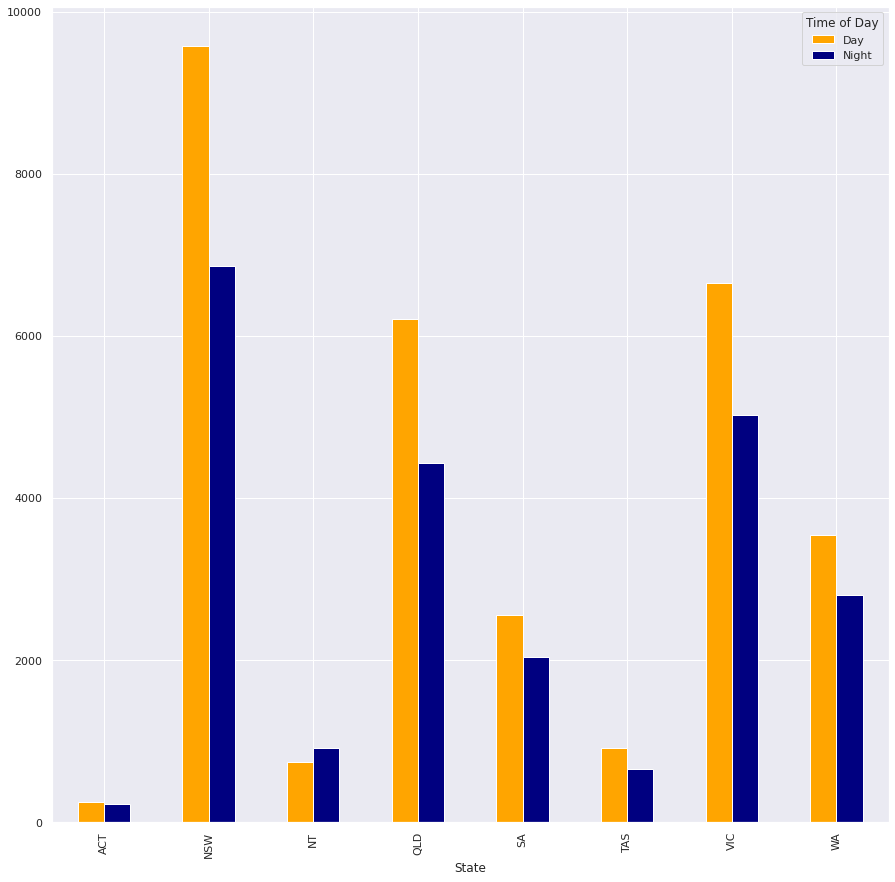

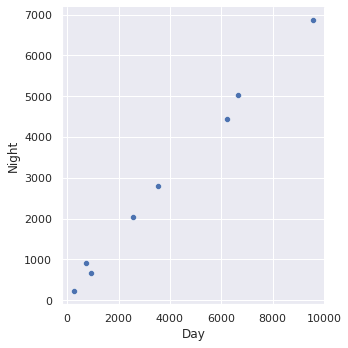

In [219]:
df12 = df_fatalities

#Select to only keep columns of interest
df12 = df12[['Time of Day','State']]

#Group and unstack columns of interest
df12 = df12.groupby(['State','Time of Day']).size()
df12 = df12.unstack()
df12 = df12.sort_values(by=['State'], ascending=True)

#Print unstacked dataframe to identify the amount of fatalities that occur at Day/Night per State
print(df12)

#Plot data
df12.plot(
 kind = 'bar',
 color = ['orange','navy'],
 figsize = [15,15]
)
plt.savefig('plot12a.png')

sns.set() 
sns.relplot( 
 data = df12, 
 kind = 'scatter', 
 x = 'Day',
 y = 'Night',
)
plt.savefig('plot12b.png')

#### **Question 11 Answer**



The number of fatalities per state are as follows:
* ACT: 253 fatalities during the day and 230 at night

* NSW: 9584 fatalities during the day and 6860 at night
* NT: 744 fatalities during the day and 920 at night
* QLD: 6211 fatalities during the day and 4430 at night
* SA:2557 fatalities during the day and 2036 at night
* TAS: 912 fatalities during the day and 657 at night
* VIC: 6654 fatalities during the day and 5031 at night
* WA: 3548 fatalities during the day and 2803 at night

The State with the highest fatalities during the day is NSW and it is also the State with the highest number of fatalities at night.

#### **12. Since 1989 which year has had the least number of fatalities? (Excluding 2022 as the year is not complete yet)**

Total Fatalities  Total Fatalities
Year                              
1989                        2800.0
1990                        2331.0
1991                        2113.0
1992                        1974.0
1993                        1953.0
1994                        1928.0
1995                        2017.0
1996                        1970.0
1997                        1767.0
1998                        1755.0
1999                        1764.0
2000                        1817.0
2001                        1737.0
2002                        1715.0
2003                        1621.0
2004                        1583.0
2005                        1627.0
2006                        1598.0
2007                        1603.0
2008                        1437.0
2009                        1491.0
2010                        1353.0
2011                        1277.0
2012                        1300.0
2013                        1187.0
2014                        1151.0
2015                

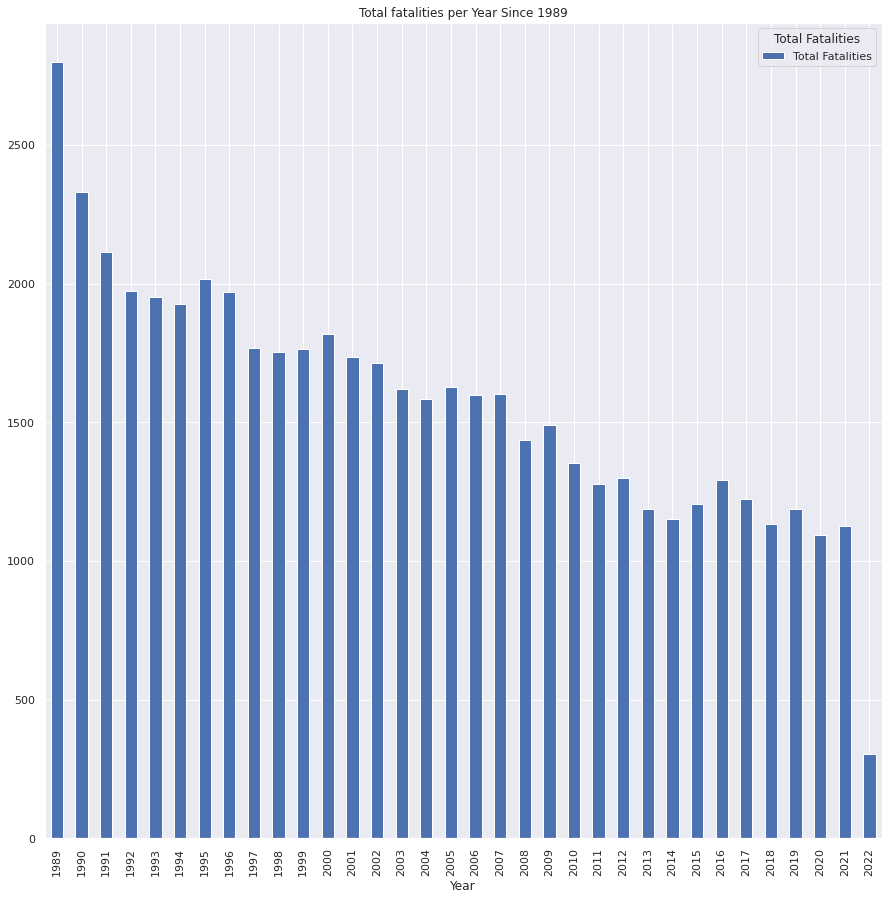

In [220]:
df13 = df_fatalcrashes

#Select the columns you want
df13 = df13[['Total Fatalities','Year']]

#Group and unstack the columns of interest and replace any missing values with 0.0
df13 = df13.groupby(['Year','Total Fatalities']).size()
df13 = df13.unstack()
df13 = df13.fillna(value=0.0)

#Adjust the results to account for the number of fatalities occuring in each category
df13['2 fatalities'] = df13[2]*2
df13['3 fatalities'] = df13[3]*3
df13['4 fatalities'] = df13[4]*4
df13['5 fatalities'] = df13[5]*5
df13['6 fatalities'] = df13[6]*6
df13['7 fatalities'] = df13[7]*7
df13['10 fatalities'] = df13[10]*10
df13['11 fatalities'] = df13[11]*11
df13['12 fatalities'] = df13[12]*12
df13['20 fatalities'] = df13[20]*20
df13['35 fatalities'] = df13[35]*35

#drop the unwanted values from the dataset
df13 = df13.drop(
    [2,3,4,5,6,7,10,11,12,20,35], 
    axis = 1 
)

#Create a new column with the total sum of each row
df13['Total Fatalities'] = df13.sum(axis=1)

#Sort the values in ascending order from 1989
df13 = df13.sort_index(ascending=True)
df13 = df13[['Total Fatalities']]

#print the values for reference
print(df13)

#Plot data
df13.plot(
    kind = 'bar',
    stacked = True,
    #color = ['r', 'g'],
    figsize = [15,15],
    title = 'Total fatalities per Year Since 1989')
plt.savefig('plot13.png')

#### **Question 12 Answer**

The year with the least number of fatalities was 2020, with a total of 1095 fatalities.

### **Findings and Recommendations**

Whilst answering the proposed questions a key finding was the fact that the number of fatal crashes and fatalities has significantly declined since 1989. It was also identified that since 1989 fatal crashes involving buses and trucks has also significantly declined. The key driving factor for this steady decline witnessed across all four categories can be attributed to the proactive involvement of government agencies and the implementation of detailed strategies and plans aimed solely at significantly reducing fatal crashes from occurring. 

In 1990 the Black Spot Program was introduced, which resulted in the improvement of dangerous roads and roads where significant numbers of motor vehicle accidents typically occurred (Department of Infrastructure, Transport, Regional Development and Communications 2021). In addition to the Black Spot Program, there was increased community education in order to promote safer driver behaviour in relation to speeding, wearing seatbelts, driving after consuming alcohol, and driver fatigue (Tziotis et.al 2006). There has also been the introduction of highly intelligent systems that are capable of monitoring driver fatigue and quickly notifying emergency services of an accident to ensure medical attention is administered as quickly as possible (Tziotis et.al 2006).

During the period of 1989 to 2000 motor vehicles were also significantly improved to include improved safety features such as Electronic Stability Control, Anti-Locking Brakes, Seatbelt Alerts, and Side Impact Airbags (Newman 2004). Since then, the driver safety technology that now comes standard in most motor vehicles is extremely advanced, with new safety features constantly developed and implemented into vehicles each year, further contributing to driver safety.

In 2000, the National Road Safety Strategy was first introduced, which outlined government measures which will be implemented over the next decade in an attempt to reduce the number of road accidents occurring on Australian roads (National Road Safety Strategy 2021). Since then, there have been multiple strategies devised and implemented by the government agency, with the current strategy aiming to reduce serious driving related injuries by 30% and driving related fatalities by 50% by the end of 2030 (National Road Safety Strategy 2021).
Whilst the fatal crashes and fatalities have decreased over the years it is important to notice some significant trends from the data that require similar attention in order to adequately address the underlying issues and factors, in order to further reduce the total number of crashes and fatalities. 

It was identified that the greatest number of fatal crashes occur within NSW with the total number of crashes significantly greater than any of the other States. It was also identified that the greatest number of fatal crashes across the data occur at the speed limit of 100KM. Therefore, it would be highly recommended for the NSW government to identify whether they have a greater number of 100KM roads compared to other states and whether the speed limits of these roads may need to be lowered to suit the road conditions, or perhaps varied speed limits may need to be introduced during certain periods or wet weather conditions or better visibility for road signs indicating the speed limit. 

It was also identified that a significant proportion of male drivers between the ages of 40 and 64 contribute to the greatest number of fatalities on Australian roads. It is worth investigating why males overall are involved in a greater number of fatalities. For example, whether it is the result of physiological differences between the two sexes or if perhaps males are more likely to partake in risky behaviours that contribute to fatal crashes and fatalities as a result. If this is the case then educational programs should be implemented that aim to address this behaviour and promote safer driving with males as a primary focus, whilst still remaining relevant for all genders, in order to help reduce the number of female fatalities as well. Furthermore, it may be beneficial to implement driver safety programs for drivers over the age of 40 as female drivers in this age bracket are also involved in the greatest number of fatalities compared to females in any other age bracket.

When looking at the holiday periods it was identified that a greater number of fatal crashes occur during the Christmas period compared to the Easter period. This could be attributed to the fact that the Christmas period covers 12 days in total whereas the Easter period only covers 5. In addition, a vast majority of businesses and workplaces close over the Christmas period and this holiday period always coincides with the end of the school year compared to the Easter period, which does not always fall during school holidays. As a result, it is highly likely that more people would choose to travel during Christmas versus Easter. Therefore, it is important for road safety measures to take this into account in order to mitigate the increased traffic on the roads, which touches back on the idea of reviewing speed limits and introducing variable speed limits for periods of increased drivers on the roads. 

According to the data February was identified as the month of the year in which the least number of fatalities occur. It is worth analysing this particular month within each state to identify why less fatalities occur during this month, and any significant findings could be used to improve strategies for mitigating road use in other months to see if the number of fatal crashes and fatalities can be significantly reduced. This also ties in with the days of the week as Saturdays were identified as the day of the week with the greatest number of fatalities versus Mondays which have the least number of fatalities. A similar strategy is highly recommended for identifying what factors are in place that result in a smaller number of fatalities occurring on a Monday. These factors could then be potentially isolated and applied to other days of the week to see a reduction in the number of fatalities occurring on those days as well. 

In addition, it was identified that a greater number of fatal crashes occur during the period of 6am to 5:59pm each day. This period covers peak hour traffic in both the morning and afternoon, and it would be recommended to also evaluate the current speed limits in place during these periods as well as the road conditions and the ability of roads to keep up with the increased number of users on the road. For example, if a road with a significantly large volume of road users only has one lane each way it could increase the risk of drivers engaging in risky behaviour out of frustration, which could increase the chances of a fatal crash occurring.

Whilst analysing the data it was identified that there is a significantly greater number of single vehicle fatal crashes compared to multiple vehicle crashes. This highlights the need for an increase in driver education programs to promote safer driving behaviours to identify dangerous driving behaviours such as drink driving, mobile phone usage and driver fatigue. An increase in the implementation of intelligent alert systems or driver fatigue and dangerous behaviour monitoring systems i.e., cell phone use could see a reduction in the number of fatal crashes occurring that involve a single vehicle. 

These driver education and monitoring systems could also extend to cover pedestrians as they follow closely behind drivers and passenger as one of the top three user types involved fatal crashes. Whilst it is important for safe driving behaviours to be promoted and encouraged, it is just as vital for safe pedestrian behaviour to also be promoted. For example, walking on sidewalks whenever available, always walking in a direction that is facing oncoming traffic rather than with oncoming traffic behind you, walking as far away from traffic as possible and ensuring that all directions are scanned thoroughly before crossing the road (National Road Safety Strategy 2021). Additionally, it is important that areas with high pedestrian traffic also have the speed limits and road conditions thoroughly reviewed in order to ensure the speed limits account for the pedestrian activity and adequate sidewalks and footpaths are available to provide safe walkways and reduce the need for pedestrians to walk on the road to get where they need to go (National Road Safety Strategy 2021).

After analysing the data there was no category regarding the number of fatal crashes which occur during wet weather or other weather conditions which may impact drivers, such as during high fog. Therefore, a key recommendation for the datasets going forward would be the inclusion of data regarding the impact of weather on fatal crashes and fatalities as it essentially could account for more than 80% of the fatal crashes that occur, but due to the fact that it is not properly accounted for in the data it cannot be properly considered.




### **Conclusion**

Whilst the number of fatal crashes and fatalities has significantly improved since 1989 there is still significant room for approval. There is definitely a strong need for speed limits and road conditions to be thoroughly reviewed for areas with a greater number of fatalities and crashes in order to ensure that driver safety is thoroughly upheld. 

However, it is also important for those areas associated with lower fatalities and crashes to also be subjected to the same level of thorough reviewal in order to see if there are any measures in place which can be isolated and applied to those areas with greater numbers of fatalities in order to significantly reduce the number of fatal crashes and fatalities that occur overall. This will be a key factor in helping to achieve the goals outlined within the National Road Safety Strategy in the intended timeframe.

### **References**


1.	Australian Bureau of Statistics 2021, Motor Vehicle Census, Australia, Australian Bureau of Statistics, accessed 13 April 2022, < https://www.abs.gov.au/statistics/industry/tourism-and-transport/motor-vehicle-census-australia/latest-release>.

2.	Australian Institute of Health and Welfare 2022, Injury In Australia: Transport Accidents, Australian Government, accessed 15 April 2022, < https://www.aihw.gov.au/reports/injury/injury-in-australia/contents/all-causes-of-injury>.

3.	Bureau of Infrastructure and Transport Research Economics (BITRE) 2022, Australian Road Deaths Database (ARDD), Australian Government, accessed 13 April 2022, < https://data.gov.au/data/dataset/australian-road-deaths-database>.

4.	Department of Infrastructure, Transport, Regional Development and Communications 2021, Black Spot Program, Australian Government, accessed 14 April 2022, < https://investment.infrastructure.gov.au/about/local-initiatives/black-spot-program/index.aspx>. 

5.	Knaus, C 2017, Road Crashes Cost Australian Society Almost $30bn A Year -Report, The Guardian, accessed 14 April 2022, <https://www.theguardian.com/world/2017/sep/11/road-crashes-cost-australian-society-almost-30bn-a-year-report>.

6.	National Road Safety Strategy 2021, National Road Safety Strategy 2021-30, Australian Government, accessed 13 April 2022, < https://www.roadsafety.gov.au/nrss >.

7.	National Road Safety Strategy 2021, Fact Sheet: Vulnerable Road Users 2021-30, Australian Government, accessed 13 April 2022, < https://www.roadsafety.gov.au/nrss/fact-sheets/vulnerable-road-users >.

8.	Newman, G 2004, Car Safety and Car Security: An Historical Comparison, Crime Prevention Studies, accessed 15 April 2022, < https://www.academia.edu/49256164/Car_safety_and_car_security_An_Historical_Comparison>.

9.	Risbey, T, Cregan, M & De Silva, H 2010, Social Cost of Road Crashes, Australian Government, accessed 14 April 2022, < https://www.bitre.gov.au/sites/default/files/sp_003_Risbey_Cregan_deSilva.pdf>.

10.	Tziotis, M, Roper, P, Edmondston, C, Sheehan, M 2006, Guide to Road Safety Part 5, Austroads, accessed April 15, 2002, < https://austroads.com.au/publications/road-safety/agrs05-06/media/AGRS05-06_Guide_to_Road_Safety_Part_5_Road_Safety_for_Rural_and_Remote_Areas.pdf>.

